# Library

In [5]:
# Ignore the warnings
import warnings
# warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# System related and data input controls
import os

# Python path
import sys
base_folder = 'DataScience'
location_base = os.path.join(os.getcwd().split(base_folder)[0], base_folder)
location_module = [os.path.join(location_base, 'Module')] 
for each in location_module:
    if each not in sys.path:
        sys.path.append(each)

# Auto reload of library
%reload_ext autoreload
%autoreload 2

from import_KK import *
from data_KK import *
DeviceStrategy_CPU()
from preprocessing_KK import *
from preprocessing_text_KK import * ##
from visualization_KK import * ##
from algorithm_textmining_KK import *
from algorithm_machinelearning_KK import *
from algorithm_deeplearning_KK import *
from evaluation_KK import *

# 하이퍼파라미터
DELETE_KEYWORD = ['100세', '거주환경']
CATEGORY_BK = ['경제', '사회', '문화', '국제']
CATEGORY_BK_Sub = ['경제>경제일반', '경제>국제경제', '경제>취업_창업',
                   '사회>노동_복지', '사회>사건_사고', '사회>사회일반', '사회>여성', '사회>장애인', '사회>의료_건강',
                   '문화>미술_건축', '문화>요리_여행', '문화>출판',
                   '국제>중국', '국제>유럽_EU', '국제>일본', '국제>미국_북미', '국제>중동_아프리카',
                   '국제>아시아', '국제>중남미', '국제>국제일반', '국제>러시아']
CATEGORY_CR = ['세계', '경제', '생활/문화', '오피니언', '사회', 'IT/과학']
IMAGE_LOCATION = os.path.join('.', 'Data', 'baby-icon_ver1.png')
COLNAME_CATEGORY = '일자'
COLNAME_MINING = '제목'
# SAVE_LOCATION = r'C:\Users\user\Desktop\Data'    # inu
SAVE_LOCATION = r'C:\Users\KK\Desktop\Data'    # home

# Data Preprocessing

## BigKinds

In [2]:
# # 데이터로딩
# df_news = get_data_from_path(os.path.join(os.getcwd(), 'Data', 'BigKinds'), folder_name=True)
# # 전처리
# ## 중복 처리
# df_news.drop_duplicates(subset=['뉴스 식별자', '언론사', COLNAME_MINING], inplace=True, ignore_index=True)
# ## 불필요 변수 삭제
# colname_delete = ['뉴스 식별자', '인물', '위치', '기관', '기고자', '통합 분류2', '통합 분류3', 
#                   '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3',
#                   '키워드', '특성추출(가중치순 상위 50개)', 'URL', '분석제외 여부']
# df_news = df_news[[col for col in df_news.columns if col not in colname_delete]]
# ## 카테고리 필터
# category_filter = [each for each in df_news['통합 분류1'].unique() if each.split('>')[0] in CATEGORY_BK]
# df_news = df_news[df_news['통합 분류1'].apply(lambda x: x in category_filter)].reset_index().iloc[:,1:]
# df_news['Category'] = df_news['통합 분류1'].apply(lambda x: x.split('>')[0])
# ## 전처리
# df_news[COLNAME_MINING] = df_news[COLNAME_MINING].progress_apply(lambda x: text_preprocessor(x, del_number=False, del_bracket_content=False))
# ## 결측치 및 빈문자 제거
# df_news = df_news[~df_news[COLNAME_MINING].isnull()].reset_index().iloc[:,1:].copy()
# df_news = df_news[df_news[COLNAME_MINING].str.len() != 0].reset_index().iloc[:,1:]

# # 날짜 변환
# ## 연도 반영
# df_news[COLNAME_CATEGORY+'_Year'] = pd.to_datetime(df_news[COLNAME_CATEGORY].astype(str)).dt.year
# ## 연도+월 반영
# df_news[COLNAME_CATEGORY+'_YearMonth'] = pd.to_datetime(df_news[COLNAME_CATEGORY].astype(str)).dt.strftime('%Y-%m')
# ## 연도그룹 반영
# df_news[COLNAME_CATEGORY+'_Era'] = df_news[COLNAME_CATEGORY].apply(lambda x: '2013 ~ 2017' if str(x)[:4] in ['2013', '2014', '2015', '2016', '2017']
#                                                                                             else '2018 ~ 2023')

# # 긍부정 라벨 추가
# df_news_sentiment = get_data_from_path(os.path.join(os.getcwd(), 'Data', 'Sentiment'), folder_name=False)
# df_news_sentiment = df_news_sentiment.sort_values(by='Unnamed: 0').reset_index().iloc[:,2:]
# df_news_sentiment.columns = ['Sentiment']
# df_news_sentiment['Sentiment'] = df_news_sentiment.Sentiment.apply(lambda x: 'Positive' if x==2 else 'Negative')
# df_news_sentiment['Positive'] = df_news_sentiment.Sentiment.apply(lambda x: 1 if x=='Positive' else 0)
# df_news_sentiment['Negative'] = df_news_sentiment.Sentiment.apply(lambda x: -1 if x=='Negative' else 0)
# df_news = pd.concat([df_news, df_news_sentiment], axis=1)
# ## 최대 중복 처리
# df_news.drop_duplicates(subset=['언론사', COLNAME_MINING], inplace=True, ignore_index=True)
# df_news.drop_duplicates(subset=[COLNAME_MINING], inplace=True, ignore_index=True)

# # 저장
# df_news.to_csv(os.path.join(SAVE_LOCATION, 'df_news_bigkinds.csv'), index=False, encoding='utf-8-sig')

In [6]:
## 불러오기
df_news = pd.read_csv(os.path.join(SAVE_LOCATION, 'df_news_bigkinds.csv'))
print('Category: ', df_news.Category.value_counts())
keyword_filter = [each for each in df_news['Folder_Name'].unique() if each not in DELETE_KEYWORD]
df_news = df_news[df_news['Folder_Name'].apply(lambda x: x in keyword_filter)].reset_index().iloc[:,1:]
category_filter = [each for each in df_news['통합 분류1'].unique() if each in CATEGORY_BK_Sub]
df_news = df_news[df_news['통합 분류1'].apply(lambda x: x in category_filter)].reset_index().iloc[:,1:]
print('Category: ', df_news.Category.value_counts())

Category:  Category
경제    182058
사회    175598
문화     96737
국제     37249
Name: count, dtype: int64
Category:  Category
사회    143555
경제     46072
국제     35535
문화     21051
Name: count, dtype: int64


## Naver Crawling

In [4]:
# # 데이터로딩
# df_news = get_data_from_path(os.path.join(os.getcwd(), 'Data', 'NaverNews'), folder_name=True)

# # 필터링
# ## 중복 처리
# df_news.drop_duplicates(subset=['Press', 'Title'], inplace=True, ignore_index=True)
# ## 불필요 변수 삭제
# colname_delete = ['Content', 'URL_Origin']
# df_news = df_news[[col for col in df_news.columns if col not in colname_delete]]
# ## 카테고리 필터
# category_filter = [each for each in df_news.Category.unique() if each in CATEGORY_CR]
# df_news = df_news[df_news.Category.apply(lambda x: x in category_filter)].reset_index().iloc[:,1:]
# ## 언론사 중복 필터
# df_news.Press = df_news.Press.progress_apply(lambda x: str(x).split('언론사 선정')[0])

# # 날짜 변환
# df_news.Date = pd.to_datetime(df_news.Date)
# ## 연도 반영
# df_news['Date_Year'] = pd.to_datetime(df_news.Date.astype(str)).dt.year
# ## 연도+월 반영
# df_news['Date_YearMonth'] = pd.to_datetime(df_news.Date.astype(str)).dt.strftime('%Y-%m')
# ## 연도그룹 반영
# df_news['Date_Period'] = df_news.Date_Year.apply(lambda x: '2013 ~ 2017' if str(x)[:4] in ['2013', '2014', '2015', '2016', '2017']
#                                                                           else '2018 ~ 2023')
# df_news = df_news[['Folder_Name', 'Date', 'Date_Year', 'Date_YearMonth', 'Date_Period', 'Press', 'Category', 'Title', 'Comment', 'URL_Naver']]

# # 전처리
# df_news['Title'] = df_news['Title'].progress_apply(lambda x: text_preprocessor(x, del_number=False, 
#                                                                                del_bracket_content=False))
# df_news = df_news[~df_news['Title'].isnull()].reset_index().iloc[:,1:].copy()
# df_news = df_news[df_news['Title'].str.len() != 0].reset_index().iloc[:,1:]
# ## 댓글 길이가 5이상 & 갯수가 5개 이상 필터
# df_news['Comment'] = df_news['Comment'].progress_apply(lambda x: [i for i in literal_eval(x) if len(i) >= 5])
# df_news = df_news[df_news['Comment'].progress_apply(lambda x: len(x) >= 5)]

# # 언론사 필터
# ## 댓글 평균이 5이상 필터 & 발행기사수 Top100 필터
# df_news['Comment_Len'] = df_news.Comment.apply(lambda x: len(x))
# df_temp = df_news.groupby('Press')['Comment_Len'].mean()
# del_press = list(pd.DataFrame(df_temp[df_temp < 5]).index)
# del_press = del_press + list(dict(df_news.Press.value_counts()).keys())[100:]
# df_news = df_news[~df_news.Press.isin(del_press)].reset_index().iloc[:,1:]
# df_news = df_news.drop('Comment_Len', axis=1)

# # 댓글기준 explode
# df_news_explode = df_news.copy()
# df_news_explode = df_news_explode.explode('Comment')

# # 저장
# df_news.to_csv(os.path.join(SAVE_LOCATION, 'df_news_crawling.csv'), index=False, encoding='utf-8-sig')
# df_news_explode.to_csv(os.path.join(SAVE_LOCATION, 'df_news_explode_crawling.csv'), index=False, encoding='utf-8-sig')

In [7]:
# ## 불러오기
# df_news_nv = pd.read_csv(os.path.join(SAVE_LOCATION, 'df_news_crawling.csv'))
# print('Category: ', df_news_nv.Category.value_counts())
# df_newse_nv = pd.read_csv(os.path.join(SAVE_LOCATION, 'df_news_explode_crawling.csv'))

## Word Frequency

- **데이터:** 구글 뉴스 + 네이버 뉴스
- **카테고리:** 경세 + 사회 + 문화 + 국제

In [8]:
# # 연도데이터 기준 전처리
# wf_soy, waf_soy, wf_tf, waf_tf = preprocessing_wordfreq(df_news, colname_target=COLNAME_MINING, colname_category=COLNAME_CATEGORY+'_Year', 
#                          save_local=True)

# # 연도그룹데이터 기준 전처리
# wf_era_soy, waf_era_soy, wf_era_tf, waf_era_tf = preprocessing_wordfreq(df_news, colname_target=COLNAME_MINING, colname_category=COLNAME_CATEGORY+'_Era', 
#                          save_local=True,
#                          save_name_list=['word_freq_soynlp_era.csv', 'wordadj_freq_soynlp_era.csv', 
#                                          'word_freq_tfidf_era.csv', 'wordadj_freq_tfidf_era.csv'])
# ## 안되면 아래줄 실행
# if wf_era_tf.shape[0] == 0:
#     wf_era_tf = wf_tf.copy()
#     wf_era_tf.category.apply(lambda x: '2013 ~ 2017' if x in ['2013', '2014', '2015', '2016', '2017']
#                                                       else '2018 ~ 2023')
#     wf_era_tf = wf_era_tf.groupby(list(wf_era_tf.columns[:2])).mean().reset_index()
#     waf_era_tf = pd.DataFrame()
#     for category in tqdm(sorted(df_news[COLNAME_CATEGORY+'_Era'].unique())):
#         df_sub = df_news[df_news[COLNAME_CATEGORY+'_Era'] == category]
#         waf_era = preprocessing_adjwordcount(wf_era_tf[['word']], df_sub[COLNAME_MINING], num_showkeyword=5)
#         waf_era['category'] = str(category)
#         waf_era = waf_era[['category']+list(waf_era.columns[:-1])]
#         waf_era_tf = pd.concat([waf_era_tf, waf_era], axis=0, ignore_index=True)
#     save_name = os.path.join(os.getcwd(), 'Data', 'word_freq_tfidf_era.csv')
#     wf_era_tf.to_csv(save_name, index=False, encoding='utf-8-sig')
#     save_name = os.path.join(os.getcwd(), 'Data', 'wordadj_freq_tfidf_era.csv')
#     waf_era_tf.to_csv(save_name, index=False, encoding='utf-8-sig')
# ######################

# # 연도감성데이터 기준 전처리
# wf_senti_soy, waf_senti_soy, wf_senti_tf, waf_senti_tf = preprocessing_wordfreq(df_news, colname_target=COLNAME_MINING, colname_category='Sentiment', 
#                          num_showkeyword=10,
#                          save_local=True, 
#                          save_name_list=['word_freq_soynlp_senti.csv', 'wordadj_freq_soynlp_senti.csv', 
#                                          'word_freq_tfidf_senti.csv', 'wordadj_freq_tfidf_senti.csv'])

In [12]:
# 불러오기
save_name_list=['word_freq_soynlp.csv', 'wordadj_freq_soynlp.csv', 
                'word_freq_tfidf.csv', 'wordadj_freq_tfidf.csv']
save_name = os.path.join(os.getcwd(), 'Data', 'WordFreq_Old', save_name_list[0])
wf_soynlp = pd.read_csv(save_name)
save_name = os.path.join(os.getcwd(), 'Data', 'WordFreq_Old', save_name_list[1])
waf_soynlp = pd.read_csv(save_name)
save_name = os.path.join(os.getcwd(), 'Data', 'WordFreq_Old', save_name_list[2])
wf_tfidf = pd.read_csv(save_name)
save_name = os.path.join(os.getcwd(), 'Data', 'WordFreq_Old', save_name_list[3])
waf_tfidf = pd.read_csv(save_name)

# 불러오기
save_name_list=['word_freq_soynlp_era.csv', 'wordadj_freq_soynlp_era.csv', 
                'word_freq_tfidf_era.csv', 'wordadj_freq_tfidf_era.csv']
save_name = os.path.join(os.getcwd(), 'Data', 'WordFreq_Old', save_name_list[0])
wf_era_soynlp = pd.read_csv(save_name)
save_name = os.path.join(os.getcwd(), 'Data', 'WordFreq_Old', save_name_list[1])
waf_era_soynlp = pd.read_csv(save_name)
save_name = os.path.join(os.getcwd(), 'Data', 'WordFreq_Old', save_name_list[2])
wf_era_tfidf = pd.read_csv(save_name)
save_name = os.path.join(os.getcwd(), 'Data', 'WordFreq_Old', save_name_list[3])
waf_era_tfidf = pd.read_csv(save_name)

# 불러오기
save_name_list=['word_freq_soynlp_senti.csv', 'wordadj_freq_soynlp_senti.csv', 
                'word_freq_tfidf_senti.csv', 'wordadj_freq_tfidf_senti.csv']
save_name = os.path.join(os.getcwd(), 'Data', 'WordFreq_Old', save_name_list[0])
wf_senti_soynlp = pd.read_csv(save_name)
save_name = os.path.join(os.getcwd(), 'Data', 'WordFreq_Old', save_name_list[1])
waf_senti_soynlp = pd.read_csv(save_name)
# save_name = os.path.join(os.getcwd(), 'Data', 'WordFreq_Old', save_name_list[2])
# wf_posi_tfidf = pd.read_csv(save_name)
# save_name = os.path.join(os.getcwd(), 'Data', 'WordFreq_Old', save_name_list[3])
# waf_posi_tfidf = pd.read_csv(save_name)

## Word Correlation

In [6]:
# # 관련성 전처리
# wf_corr_soynlp = preprocessing_wordfreq_to_corr(wf_era_soynlp, df_news, colname_target=COLNAME_MINING, colname_category=COLNAME_CATEGORY+'_Era', num_showkeyword=100, save_name='word_corrpair_soynlp_era.csv')
# waf_corr_soynlp = preprocessing_wordfreq_to_corr(waf_era_soynlp, df_news, colname_target=COLNAME_MINING, colname_category=COLNAME_CATEGORY+'_Era', num_showkeyword=100, save_name='wordadj_corrpair_soynlp_era.csv')
# wf_corr_tfidf = preprocessing_wordfreq_to_corr(wf_era_tfidf, df_news, colname_target=COLNAME_MINING, colname_category=COLNAME_CATEGORY+'_Era', num_showkeyword=100, save_name='word_corrpair_tfidf_era.csv')
# waf_corr_tfidf = preprocessing_wordfreq_to_corr(waf_era_tfidf, df_news, colname_target=COLNAME_MINING, colname_category=COLNAME_CATEGORY+'_Era', num_showkeyword=100, save_name='wordadj_corrpair_tfidf_era.csv')

# wf_senti_corr_soynlp = preprocessing_wordfreq_to_corr(wf_senti_soynlp, df_news, colname_target=COLNAME_MINING, colname_category='Sentiment', num_showkeyword=100, save_name='word_corrpair_soynlp_senti.csv')
# waf_senti_corr_soynlp = preprocessing_wordfreq_to_corr(waf_senti_soynlp, df_news, colname_target=COLNAME_MINING, colname_category='Sentiment', num_showkeyword=100, save_name='wordadj_corrpair_soynlp_senti.csv')
# # wf_senti_corr_tfidf = preprocessing_wordfreq_to_corr(wf_senti_tfidf, df_news, colname_target=COLNAME_MINING, colname_category='Sentiment', num_showkeyword=100, save_name='word_corrpair_tfidf_senti.csv')
# # waf_senti_corr_tfidf = preprocessing_wordfreq_to_corr(waf_senti_tfidf, df_news, colname_target=COLNAME_MINING, colname_category='Sentiment', num_showkeyword=100, save_name='wordadj_corrpair_tfidf_senti.csv')


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

치매    0.9750
일자리   0.9816
한국    0.9835
여성    0.9861
환자    0.9870
       ...  
협동    1.0000
안락    1.0000
혁신성   1.0000
씨줄    1.0000
심부름   1.0000
Length: 2813, dtype: float64

 50%|█████████████████████████████████████████▌                                         | 1/2 [03:03<03:03, 183.22s/it]

치매    0.9729
일자리   0.9804
코로나   0.9804
지원    0.9813
정부    0.9832
       ...  
멍청    1.0000
중대재   1.0000
900   1.0000
챔피언   1.0000
연쇄살   1.0000
Length: 3199, dtype: float64

  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

건강_뇌      1.0000
건강_눈      1.0000
건강_돕는     1.0000
건강_부모님    1.0000
건강_위협     1.0000
여성_경력단절   1.0000
여성_단절     1.0000
여성_일자리    1.0000
여성_재취업    1.0000
여성_청년     1.0000
일자리_노인    1.0000
일자리_시간제   1.0000
일자리_창출    1.0000
일자리_청년    1.0000
일자리_추경    1.0000
치매_노모     1.0000
치매_노인     1.0000
치매_예방     1.0000
치매_위험     1.0000
치매_환자     1.0000
한국_imf    1.0000
한국_oecd   1.0000
한국_경제     1.0000
한국_고령화    1.0000
한국_노인     1.0000
dtype: float64

 50%|██████████████████████████████████████████                                          | 1/2 [00:01<00:01,  1.97s/it]

일자리_노인    1.0000
일자리_사업    1.0000
일자리_예산    1.0000
일자리_창출    1.0000
일자리_청년    1.0000
지원_강화     1.0000
지원_사업     1.0000
지원_일자리    1.0000
지원_재취업    1.0000
지원_확대     1.0000
치매_80대    1.0000
치매_노인     1.0000
치매_위험     1.0000
치매_할머니    1.0000
치매_환자     1.0000
코로나_백신    1.0000
코로나_시대    1.0000
코로나_신종    1.0000
코로나_이후    1.0000
코로나_포스트   1.0000
한국_oecd   1.0000
한국_경제     1.0000
한국_무디스    1.0000
한국_신용등급   1.0000
한국_피치     1.0000
dtype: float64

  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

노인     0.9706
치매     0.9750
일자리    0.9816
한국     0.9835
여성     0.9861
        ...  
나는     0.9982
찾아가는   0.9982
사는     0.9982
파킨슨병   0.9982
원장     0.9982
Length: 291, dtype: float64

 50%|██████████████████████████████████████████                                          | 1/2 [00:17<00:17, 17.86s/it]

노인    0.9724
치매    0.9729
일자리   0.9804
코로나   0.9804
지원    0.9813
       ...  
피부    0.9979
사는    0.9980
죽음    0.9980
전쟁    0.9981
대한    0.9982
Length: 298, dtype: float64

  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

노인_65세    1.0000
노인_70대    1.0000
노인_80대    1.0000
노인_서울     1.0000
노인_치매     1.0000
여성_경력단절   1.0000
여성_단절     1.0000
여성_일자리    1.0000
여성_재취업    1.0000
여성_청년     1.0000
일자리_노인    1.0000
일자리_시간제   1.0000
일자리_창출    1.0000
일자리_청년    1.0000
일자리_추경    1.0000
치매_노모     1.0000
치매_노인     1.0000
치매_예방     1.0000
치매_위험     1.0000
치매_환자     1.0000
한국_imf    1.0000
한국_oecd   1.0000
한국_경제     1.0000
한국_고령화    1.0000
한국_노인     1.0000
dtype: float64

 50%|██████████████████████████████████████████                                          | 1/2 [00:01<00:01,  1.63s/it]

노인_70대    1.0000
노인_80대    1.0000
노인_일자리    1.0000
노인_장애인    1.0000
노인_치매     1.0000
일자리_노인    1.0000
일자리_사업    1.0000
일자리_예산    1.0000
일자리_창출    1.0000
일자리_청년    1.0000
지원_강화     1.0000
지원_사업     1.0000
지원_일자리    1.0000
지원_재취업    1.0000
지원_확대     1.0000
치매_80대    1.0000
치매_노인     1.0000
치매_위험     1.0000
치매_할머니    1.0000
치매_환자     1.0000
코로나_백신    1.0000
코로나_시대    1.0000
코로나_신종    1.0000
코로나_이후    1.0000
코로나_포스트   1.0000
dtype: float64

  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

치매     0.9720
정부     0.9804
일자리    0.9807
지원     0.9836
환자     0.9857
        ...  
윤석     1.0000
혁신성    1.0000
7000   1.0000
복지공    1.0000
출산휴    1.0000
Length: 3384, dtype: float64

 50%|█████████████████████████████████████████▌                                         | 1/2 [05:26<05:26, 326.49s/it]

치매     0.9773
일자리    0.9813
한국     0.9826
지원     0.9848
개최     0.9853
        ...  
어디     1.0000
it     1.0000
언어치료   1.0000
플레     1.0000
식음료    1.0000
Length: 2533, dtype: float64

  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

내년_복지부        1.0000
일자리_사업        1.0000
내년_서울시        1.0000
내년_성장률        1.0000
내년_여성인구       1.0000
내년_예산         1.0000
내년_예산안        1.0000
내년_일자리        1.0000
내년_장기요양보험료율   1.0000
내년_정부         1.0000
내년_한국         1.0000
여성_20대        1.0000
여성_50대        1.0000
여성_60대        1.0000
여성_70대        1.0000
여성_80대        1.0000
여성_경력단절       1.0000
여성_노인         1.0000
여성_단절         1.0000
여성_일자리        1.0000
여성_재취업        1.0000
일자리_공공        1.0000
일자리_시간제       1.0000
일자리_노인        1.0000
일자리_예산        1.0000
지원_추가         1.0000
일자리_지원        1.0000
일자리_창출        1.0000
일자리_청년        1.0000
일자리_추경        1.0000
정부_내년         1.0000
정부_문재인        1.0000
정부_박근혜        1.0000
정부_새          1.0000
정부_윤석열        1.0000
정부_일본         1.0000
정부_저출산        1.0000
환자_코로나19      1.0000
정부_지원         1.0000
정부_코로나19      1.0000
지원_강화         1.0000
지원_금          1.0000
지원_사업         1.0000
지원_의료비        1.0000
지원_일자리        1.0000
지원_재취업        1.0000
지원_정부         1.0000
일자리_정책       

 50%|██████████████████████████████████████████                                          | 1/2 [00:09<00:09,  9.80s/it]

경제_view    1.0000
세계_경제      1.0000
경제_글로벌     1.0000
경제_내년      1.0000
경제_세계      1.0000
경제_신선한     1.0000
경제_위기      1.0000
경제_일본      1.0000
경제_중국      1.0000
경제_한국      1.0000
경제_활력      1.0000
사회_경제      1.0000
사회_고령화     1.0000
사회_공헌      1.0000
사회_안전망     1.0000
사회_없는      1.0000
사회_적       1.0000
사회_초고령     1.0000
사회_초고령화    1.0000
사회_한국      1.0000
사회_행복한     1.0000
세계_1위      1.0000
세계_여성의     1.0000
세계_2위      1.0000
세계_전       1.0000
여성_첫       1.0000
세계_최고      1.0000
세계_최고령     1.0000
세계_최대      1.0000
세계_최초      1.0000
시대_개막      1.0000
시대_고령화     1.0000
시대_뉴노멀     1.0000
시대_산업혁명    1.0000
시대_새       1.0000
시대_연다      1.0000
시대_저금리     1.0000
행복_지수      1.0000
시대_저성장     1.0000
시대_코로나     1.0000
여성_갱년기     1.0000
여성_경력단절    1.0000
여성_경제활동    1.0000
여성_위한      1.0000
여성_인재      1.0000
여성_일자리     1.0000
여성_재취업     1.0000
세계_첫       1.0000
여성_청년      1.0000
여성_한국      1.0000
일자리_노인     1.0000
일자리_박람회    1.0000
일자리_사업     1.0000
일자리_어르신    1.0000
일자리_여성     1.0000
일자리_좋은    

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:14<00:00,  7.44s/it]


In [4]:
# 불러오기
save_name_list=['word_corrpair_soynlp_era.csv', 'wordadj_corrpair_soynlp_era.csv', 
                'word_corrpair_tfidf_era.csv', 'wordadj_corrpair_tfidf_era.csv']
save_name = os.path.join(os.getcwd(), 'Data', save_name_list[0])
wf_corr_soynlp = pd.read_csv(save_name)
save_name = os.path.join(os.getcwd(), 'Data', save_name_list[1])
waf_corr_soynlp = pd.read_csv(save_name)
save_name = os.path.join(os.getcwd(), 'Data', save_name_list[2])
wf_corr_tfidf = pd.read_csv(save_name)
save_name = os.path.join(os.getcwd(), 'Data', save_name_list[3])
waf_corr_tfidf = pd.read_csv(save_name)

save_name_list=['word_corrpair_soynlp_senti.csv', 'wordadj_corrpair_soynlp_senti.csv', 
                'word_corrpair_tfidf_senti.csv', 'wordadj_corrpair_tfidf_senti.csv']
save_name = os.path.join(os.getcwd(), 'Data', save_name_list[0])
wf_senti_corr_soynlp = pd.read_csv(save_name)
save_name = os.path.join(os.getcwd(), 'Data', save_name_list[1])
waf_senti_corr_soynlp = pd.read_csv(save_name)
# save_name = os.path.join(os.getcwd(), 'Data', save_name_list[2])
# wf_senti_corr_tfidf = pd.read_csv(save_name)
# save_name = os.path.join(os.getcwd(), 'Data', save_name_list[3])
# waf_senti_corr_tfidf = pd.read_csv(save_name)

# 구글 검색량 트렌드 예측

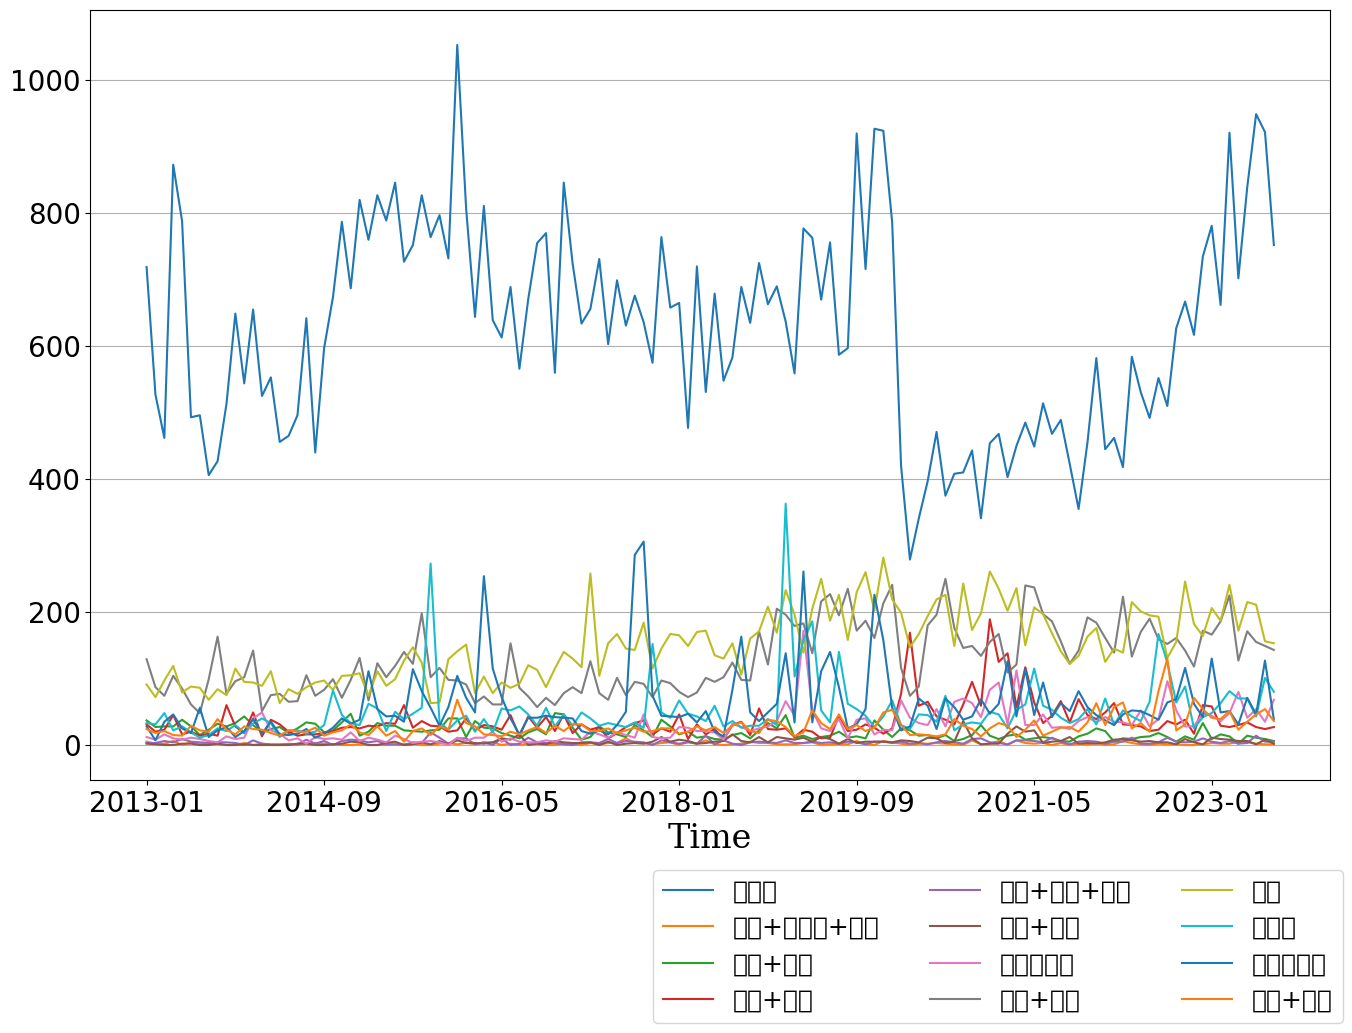

Numerical Scaling... ( 2023-10-28 22:15:06.000666 )


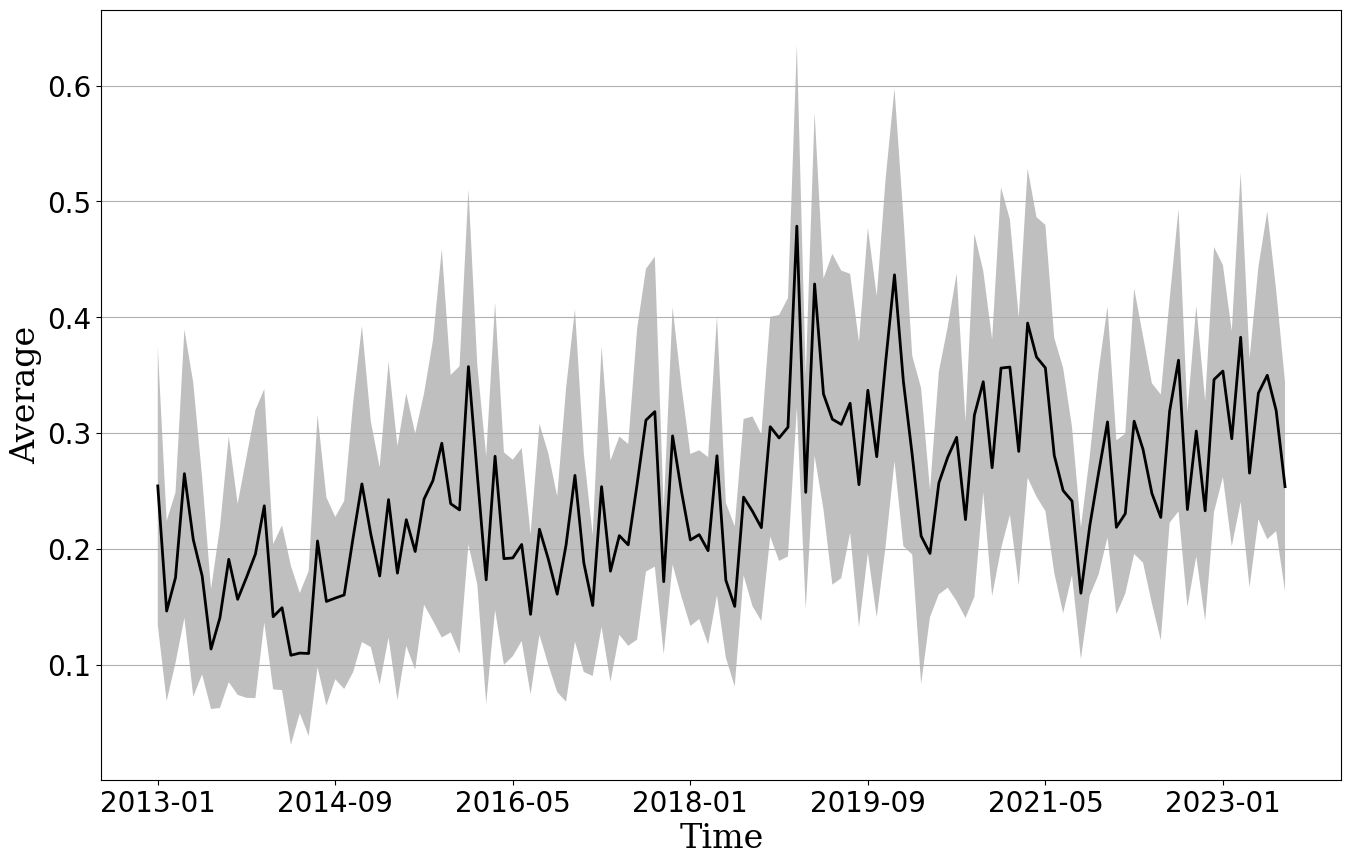

<<< Time Plot Summary >>>


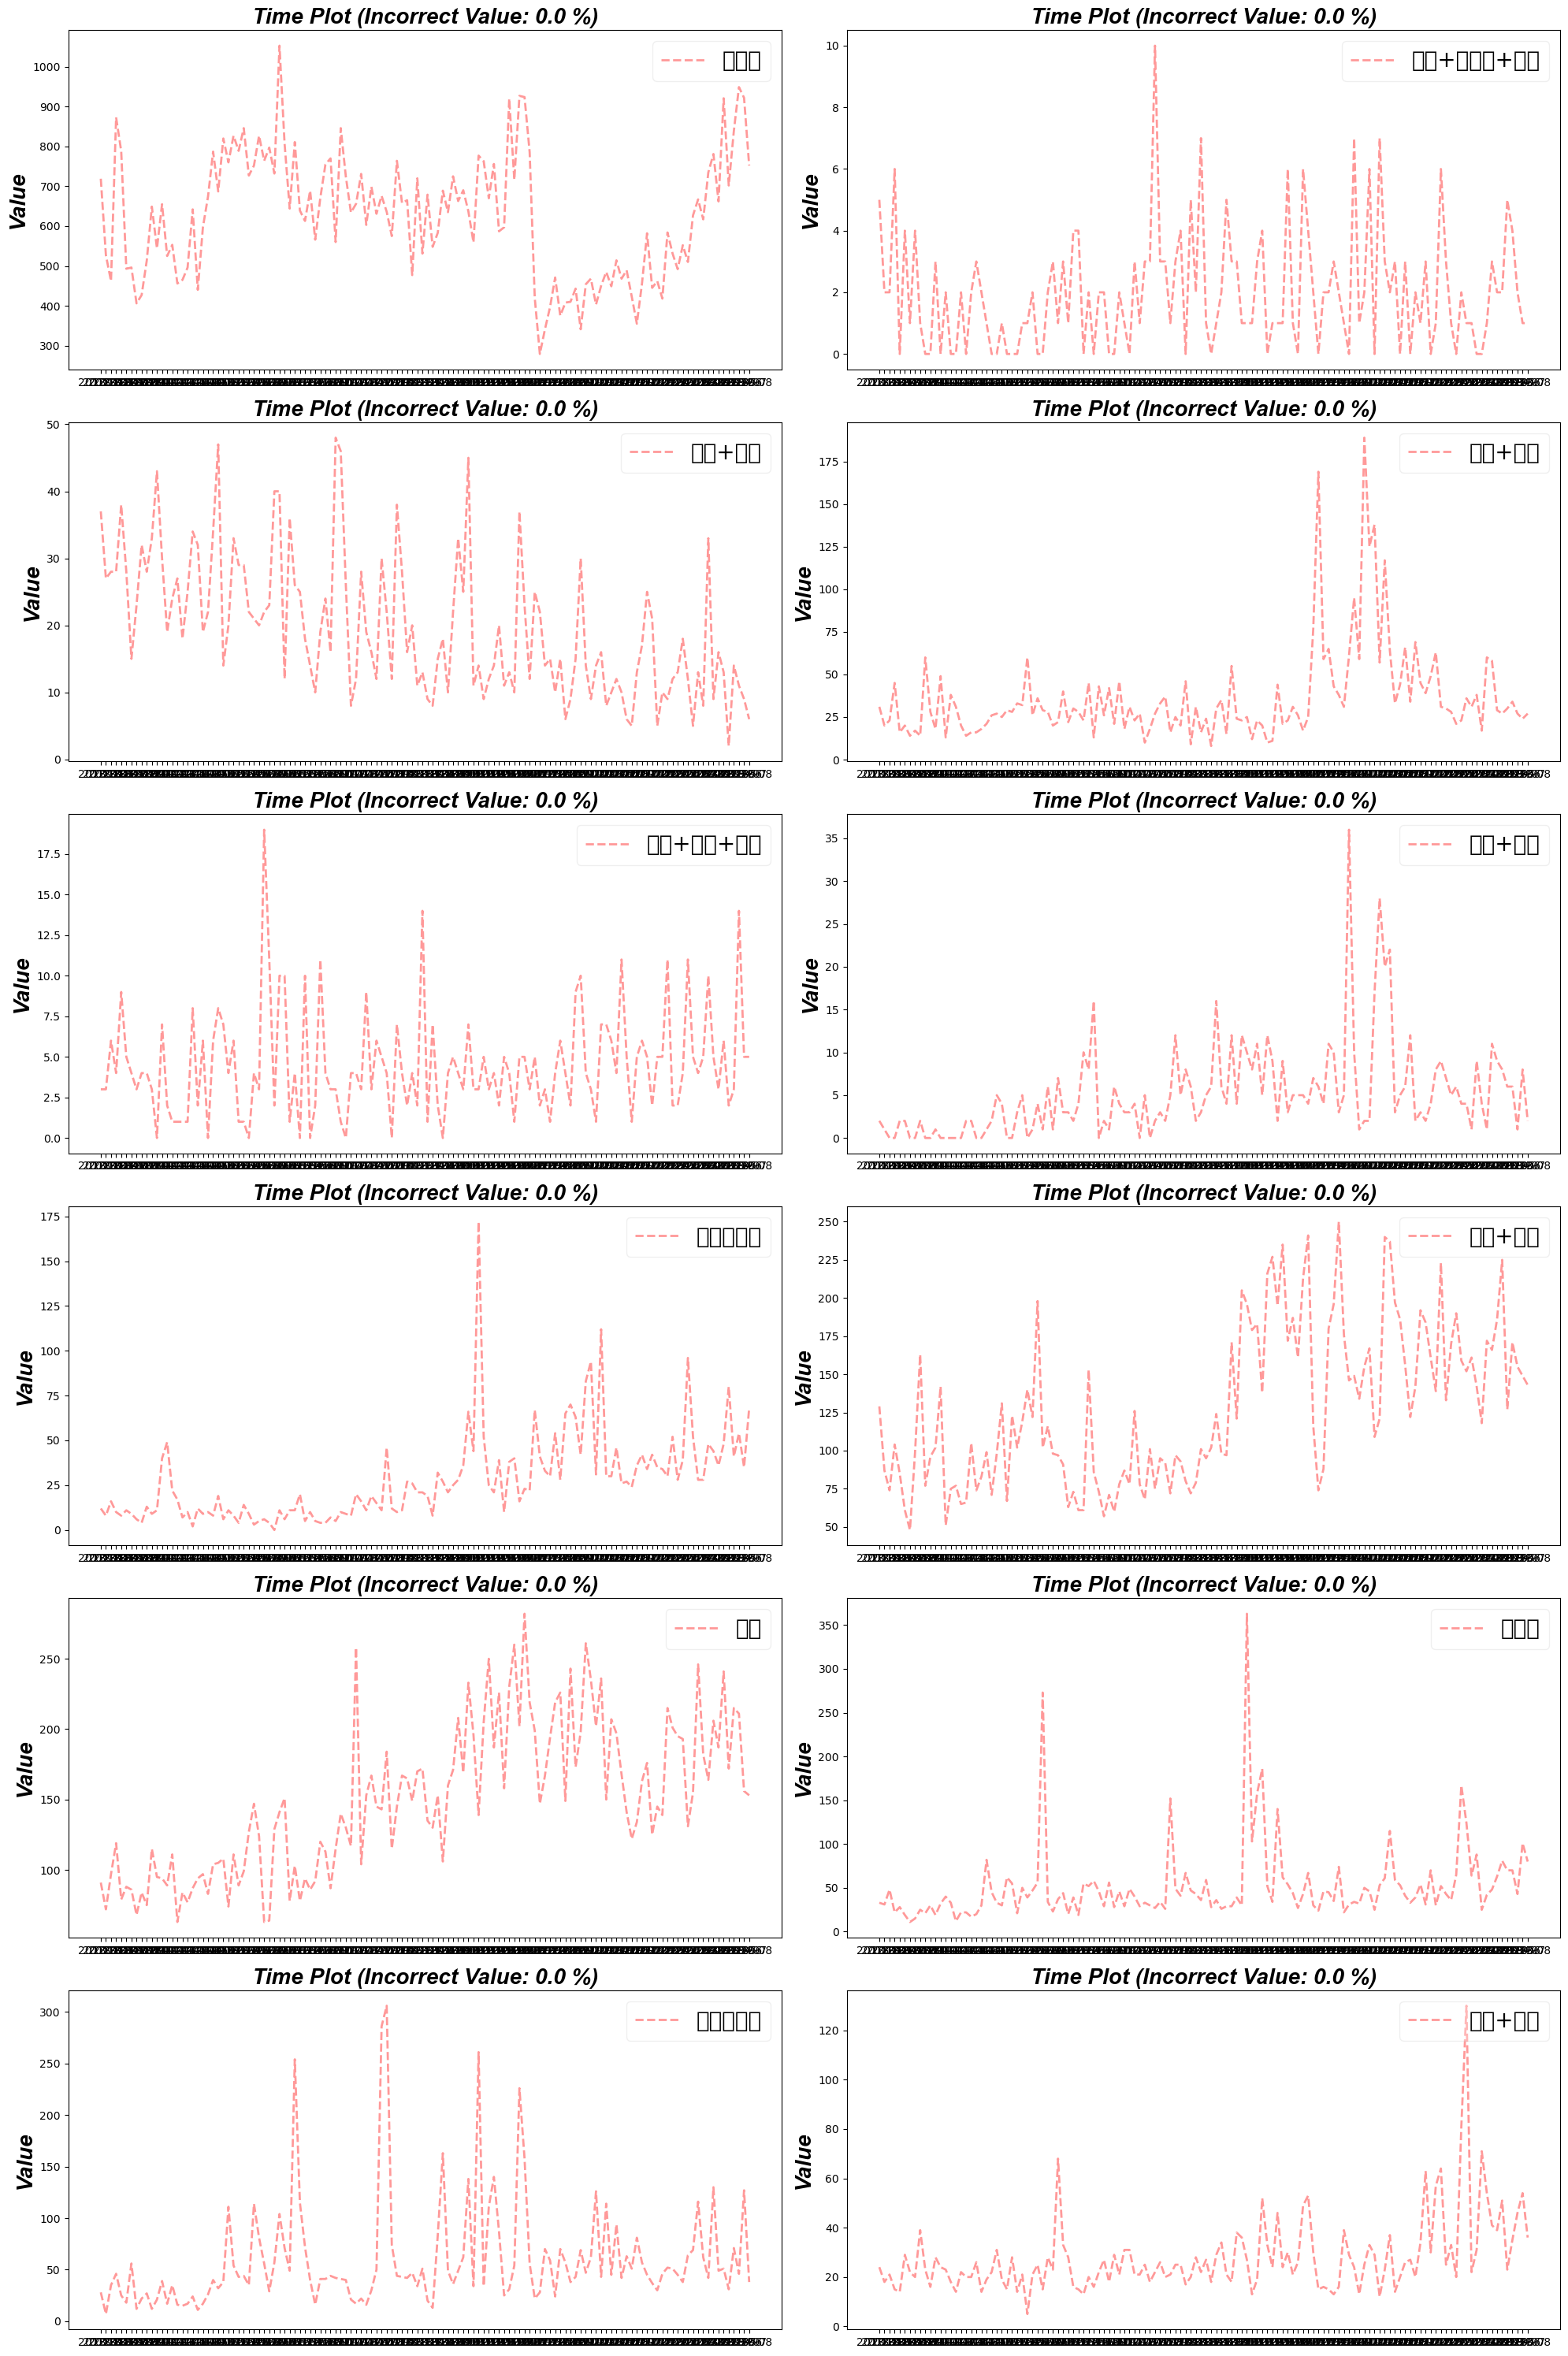

In [13]:
## 증가변수 필터
df_news_rising = df_news_bk.groupby(['Folder_Name', '일자_YearMonth'])['제목'].count().unstack(level=0).fillna(0)
RISING_CATEG = ['고령화', '노인+경제적+자립', '노인+봉사', '노인+의료', 
                '노인+주택+문제', '노인+혐오', '돌봄서비스', '세대+갈등', '소회', 
                '안락사', '알츠하이머', '연령+통합']
df_news_rising = df_news_rising[RISING_CATEG].copy()
## 시각화
plot_timeseries_dforigin(df_news_rising, save_local=True, save_name_initial='gt_total_origin.png')
plot_timeseries_dfmeanstd(df_news_rising, scaled=True, save_local=True, save_name_initial='gt_total_scaled.png')
plot_timeseries(df_news_rising, save_local=True, save_name_initial='gt_each_origin.png')

# 검색어 및 긍부정 트렌드

## 검색어 트랜드: 연도별

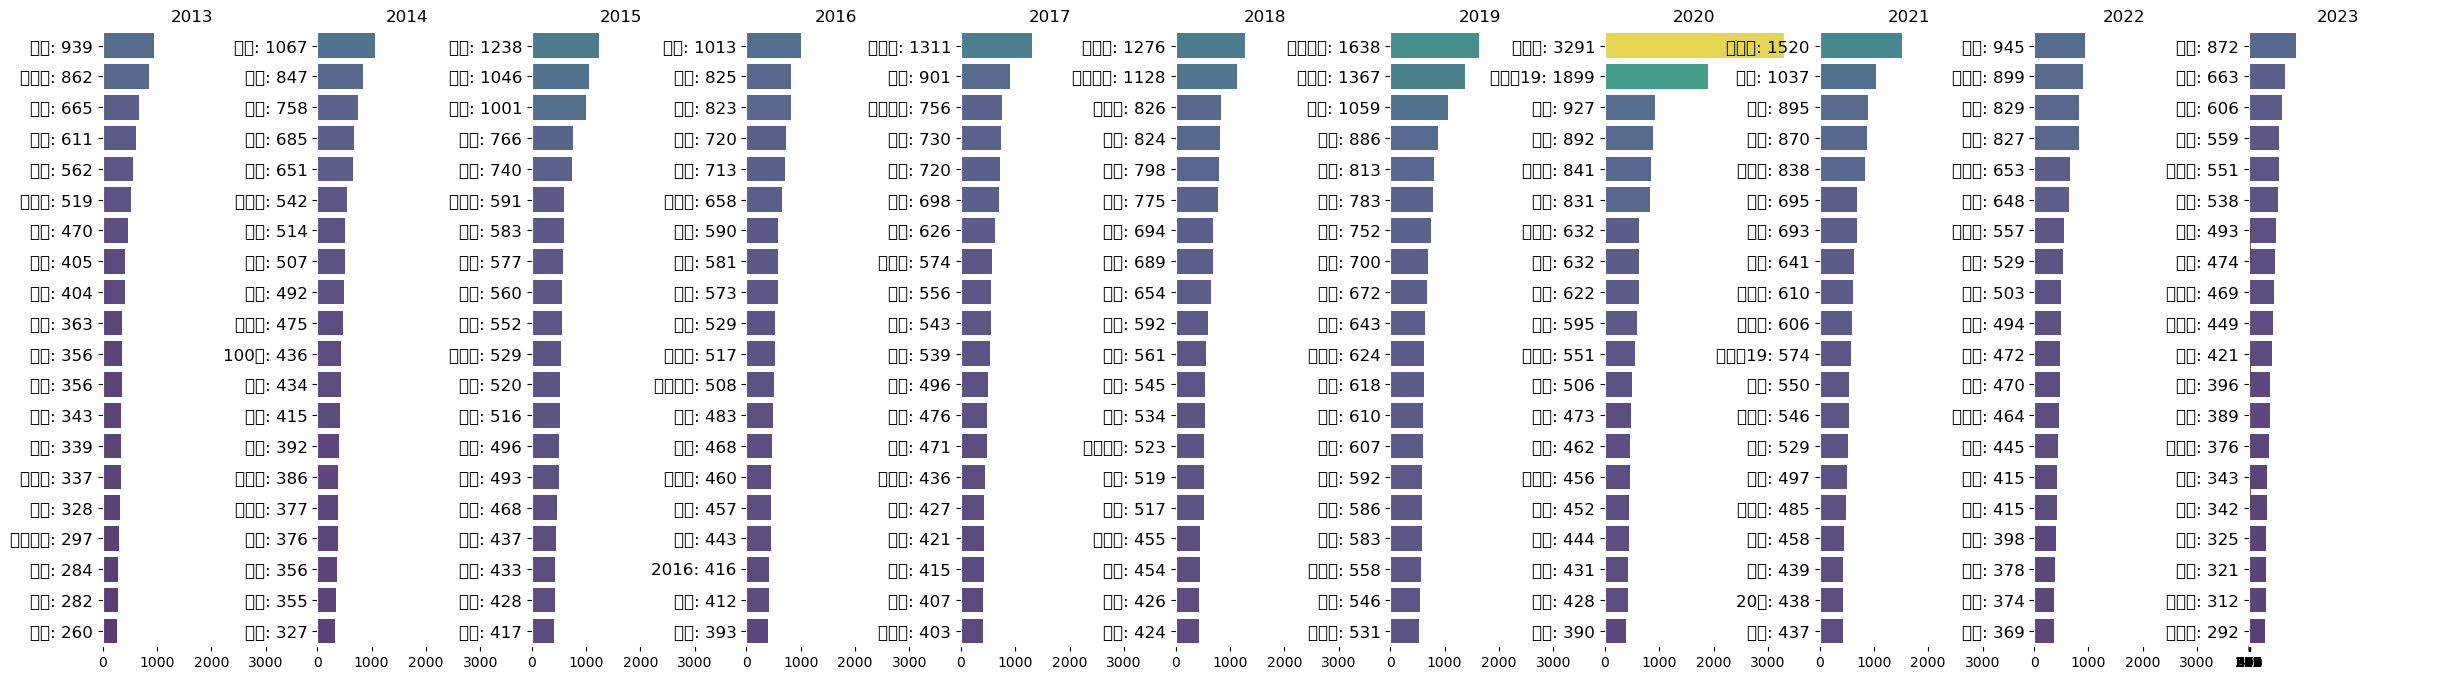

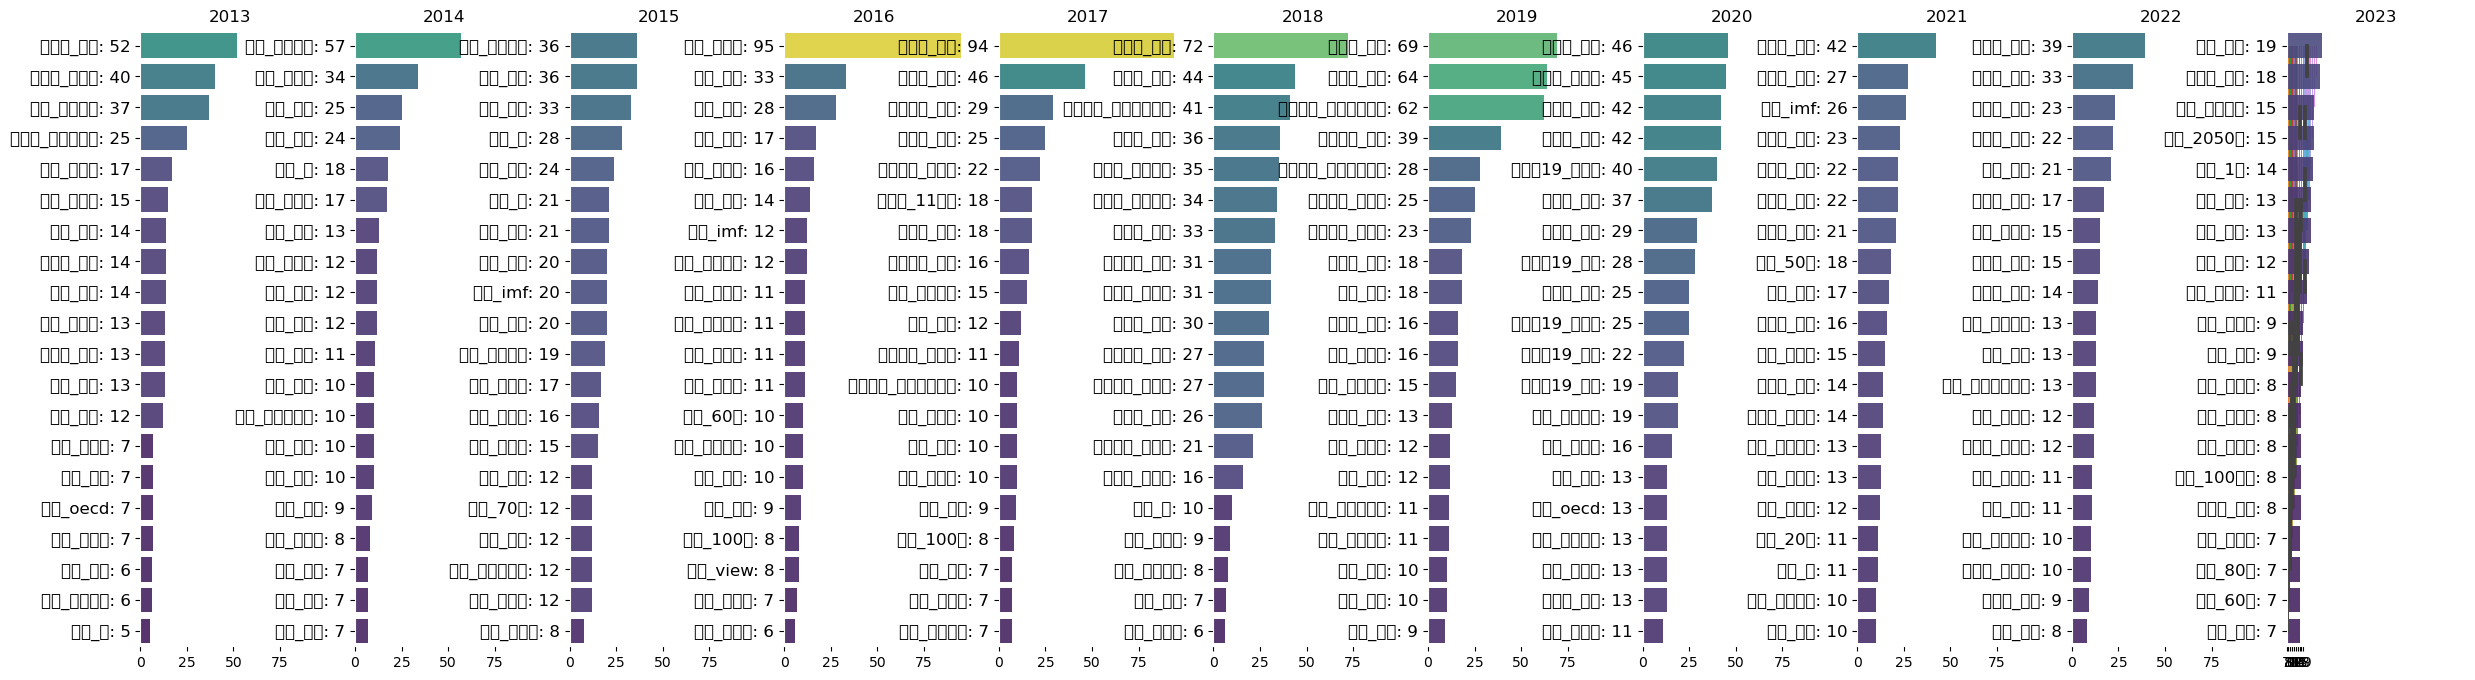

In [11]:
# word freq 비교 트랜드 시각화
plot_treemap_wordfreq(wf_soynlp, num_showkeyword=100, title='Ageism by Year', plot_studio=True, save_local=True, save_name='trend_year_compare_treemap.html')
plot_sunburst_wordfreq(waf_soynlp, title='Ageism by Year', plot_studio=True, save_local=True, save_name='trend_year_compare_sunburst.html')
plot_bar_wordfreq(wf_soynlp, figsize=(30,8), num_showkeyword=20, title='Ageism by Year', save_local=True, save_name='trend_year_compare_bar_byword.png')
plot_bar_wordfreq(waf_soynlp, figsize=(30,8), num_showkeyword=20, title='Ageism by Year', save_local=True, save_name='trend_year_compare_bar_bywordadj.png')

## 검색어 트랜드: 시대별

2013 ~ 2017


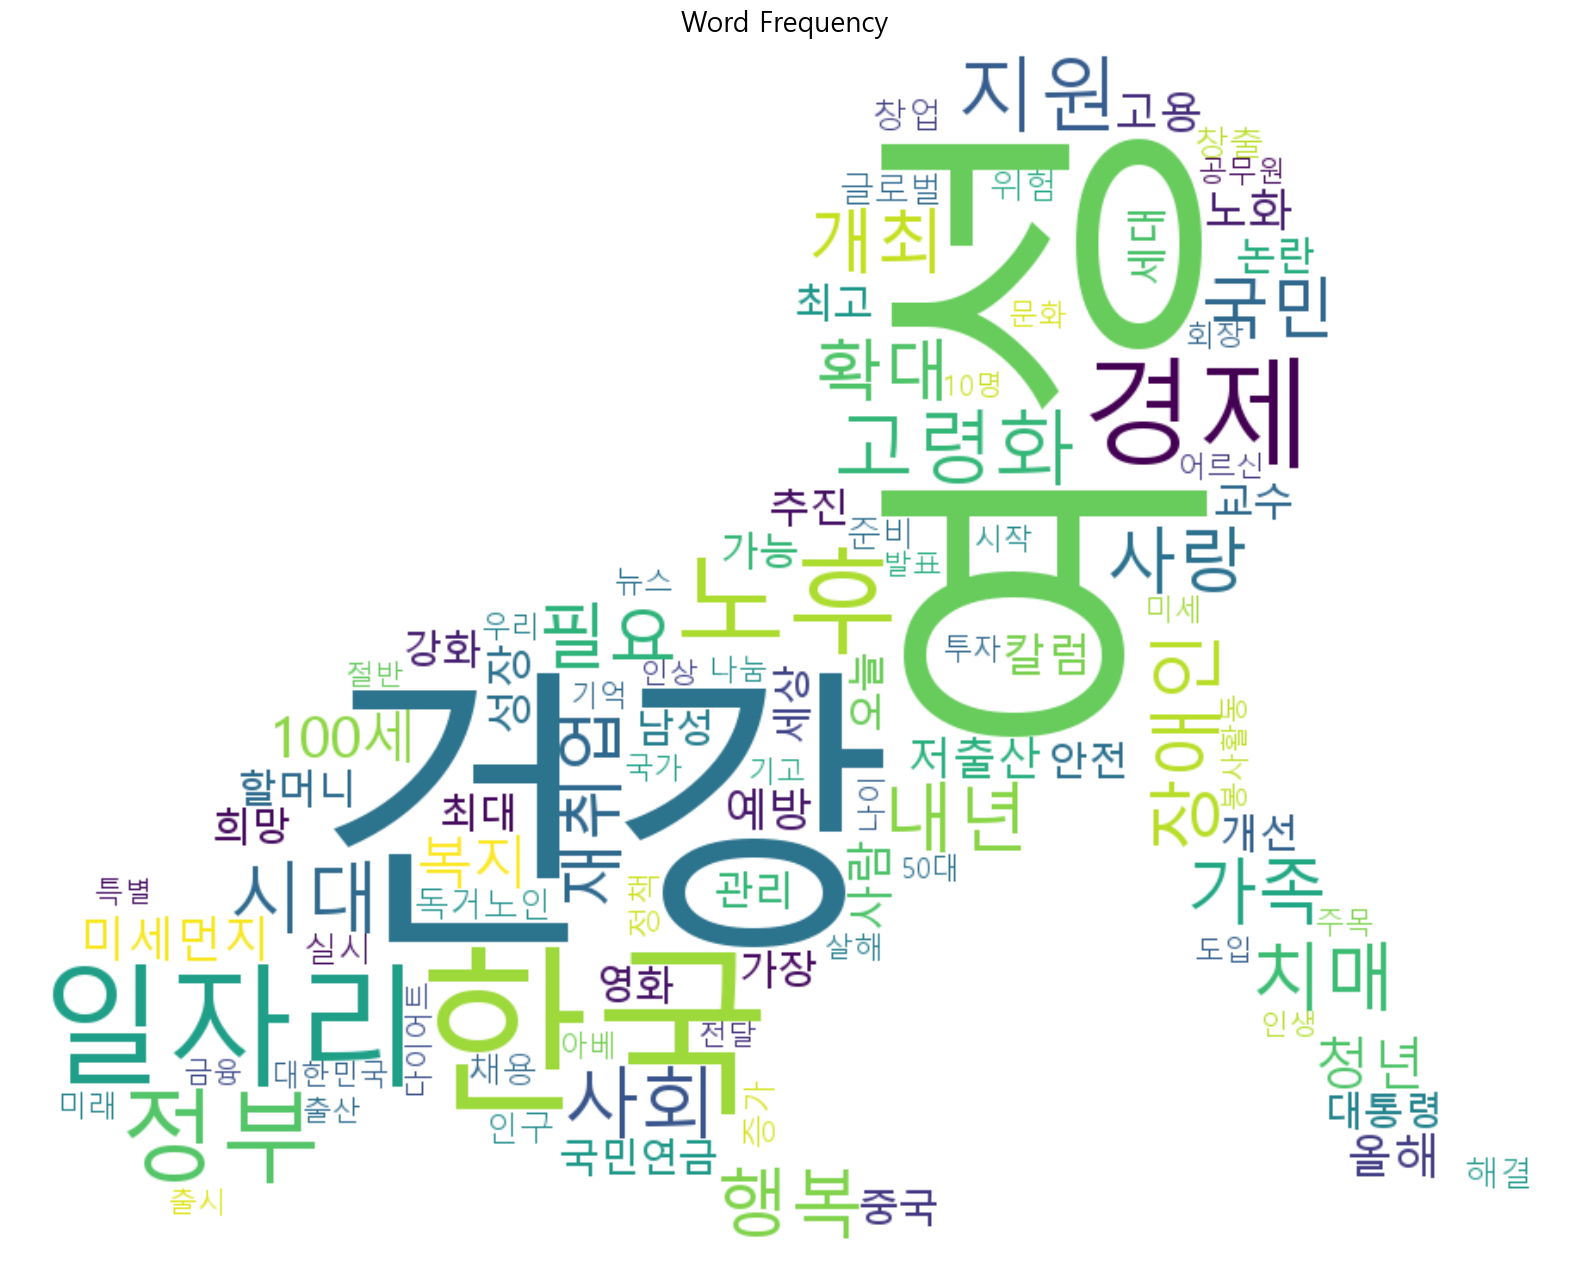

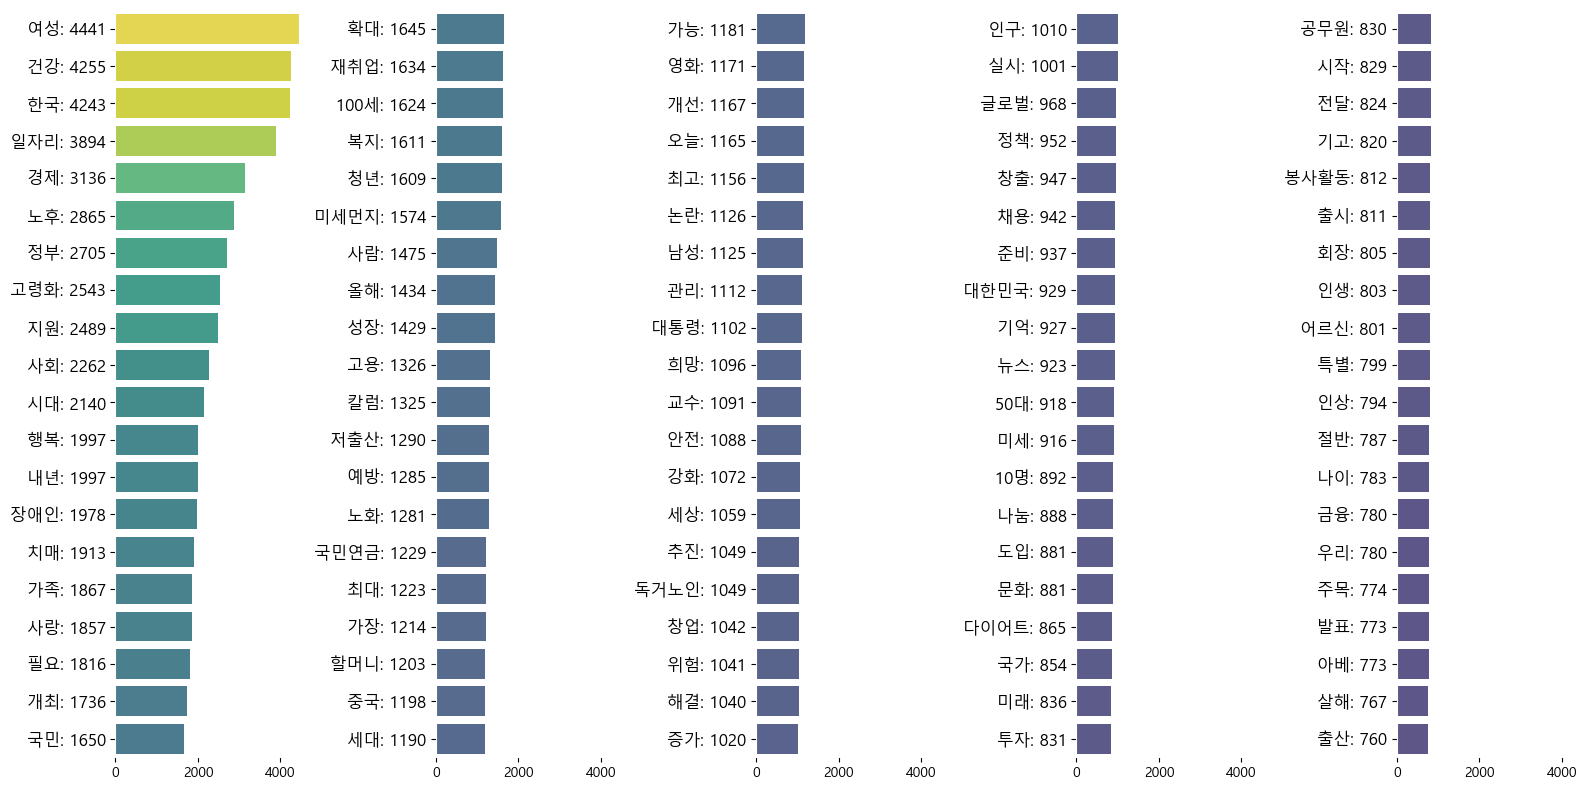

'Descriptive statistics of pairweight: '

count   mean    std     min     25%     50%    75%    max
correlation 9,702.0000 0.0007 0.0123 -0.0141 -0.0035 -0.0021 0.0011 0.3758

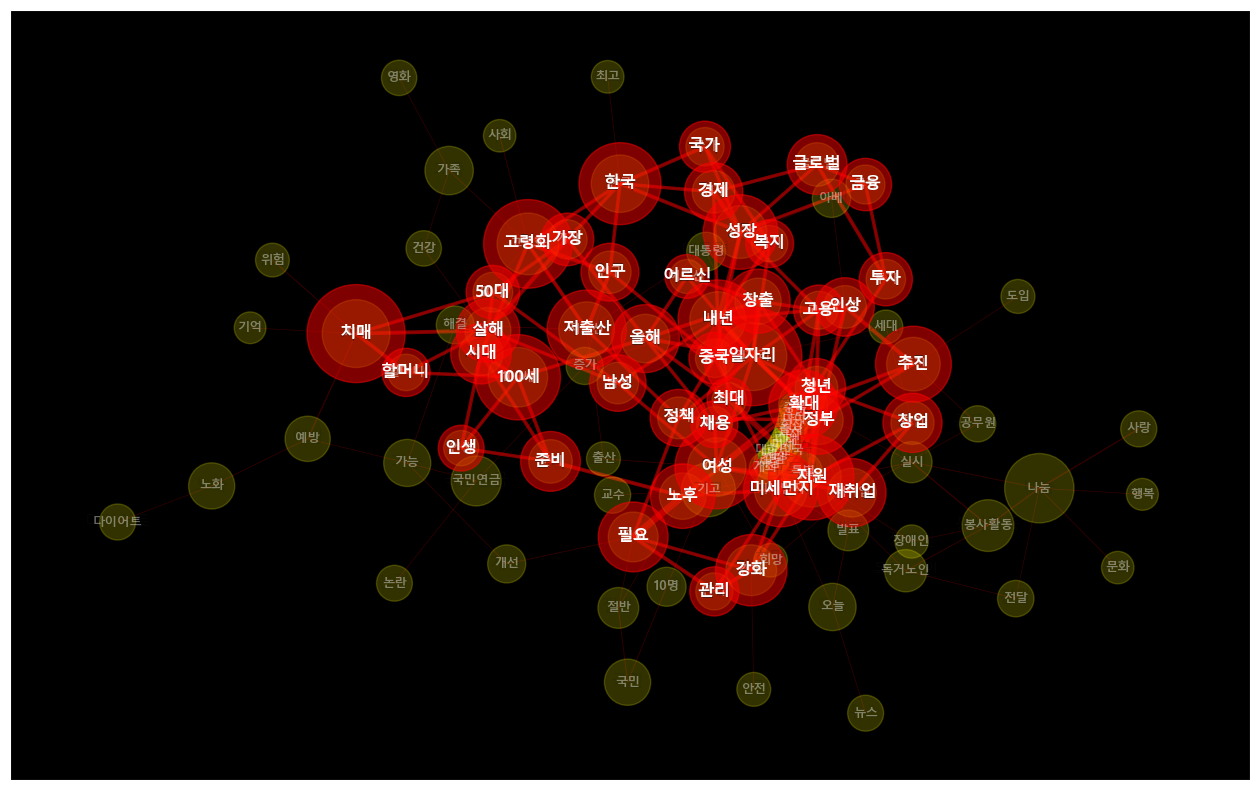

2018 ~ 2023


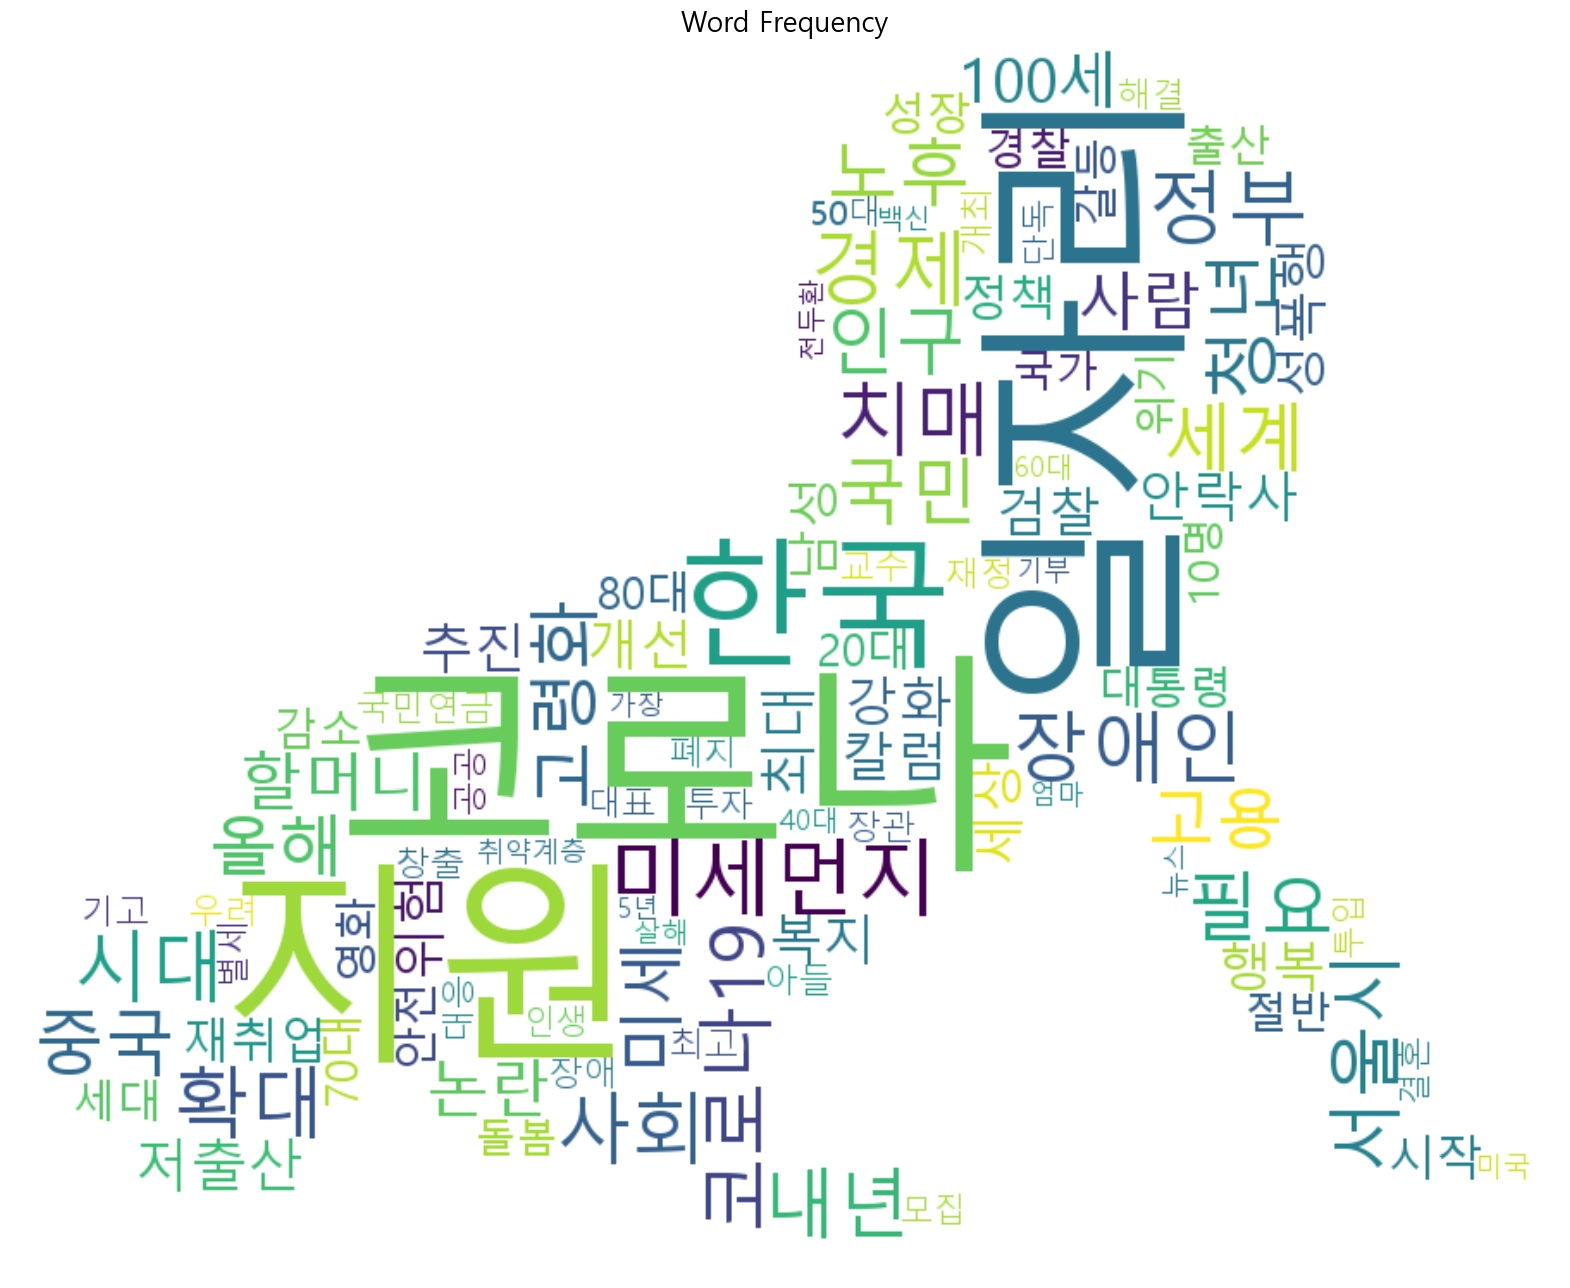

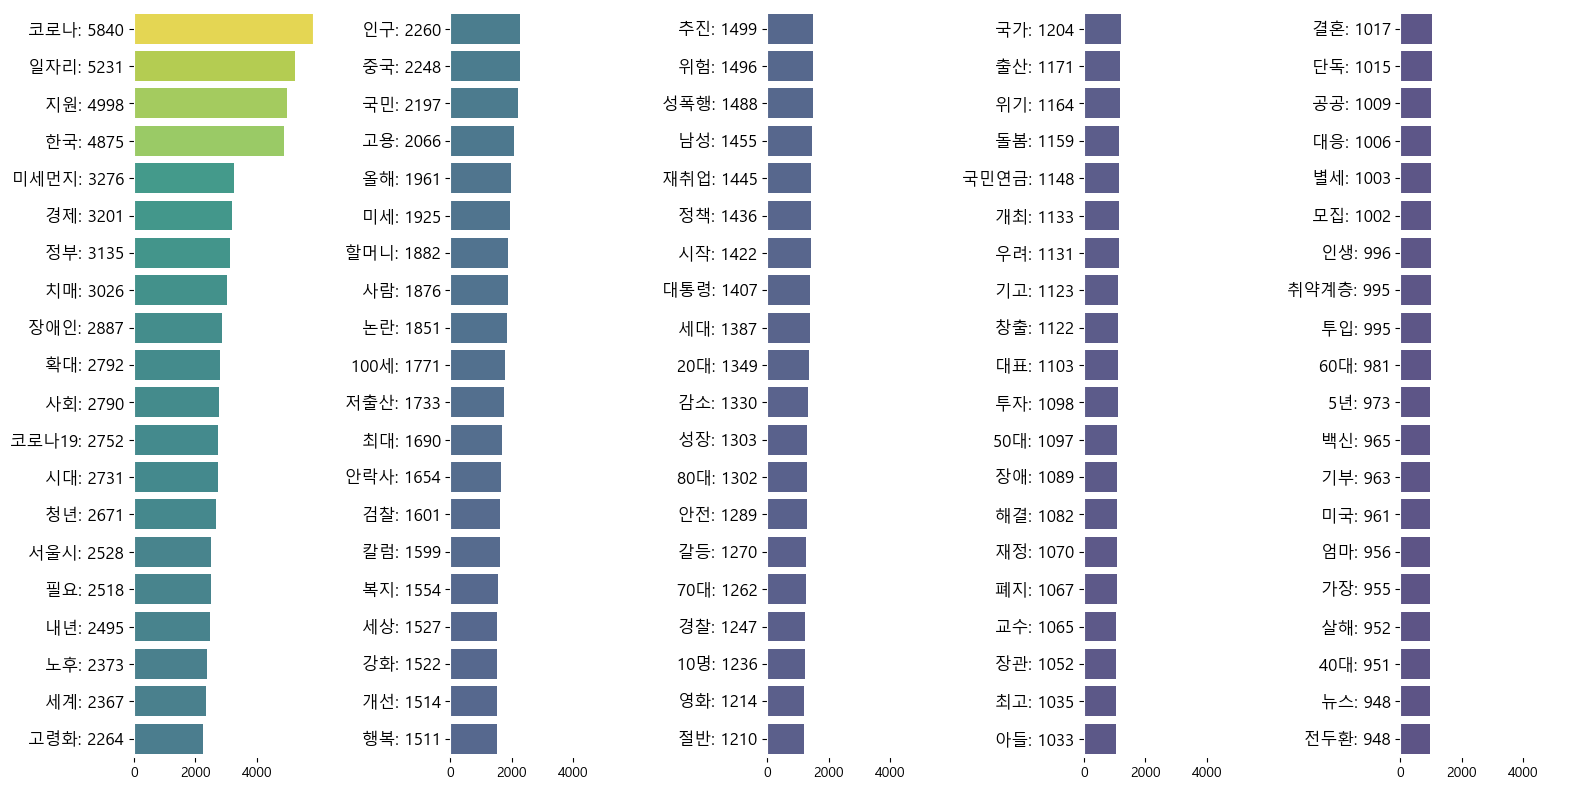

'Descriptive statistics of pairweight: '

count   mean    std     min     25%     50%    75%    max
correlation 9,900.0000 0.0011 0.0139 -0.0162 -0.0042 -0.0023 0.0016 0.3283

In [14]:
# 연도별 word freq 시각화
centrality_categ = pd.DataFrame()
for category in wf_era_soynlp[wf_era_soynlp.columns[0]].unique():
    print(category)
    wf_sub = wf_era_soynlp.groupby(wf_era_soynlp.columns[0]).get_group(category)
    wc_sub = wf_corr_soynlp[wf_corr_soynlp.category.isin([category])]
    
    plot_wordcloud(wf_sub.iloc[:,1:], mask_colorgen=False, max_words=100, mask_location=IMAGE_LOCATION, save_local=True, save_name='trend_era_wordcloud_'+'~'.join(category.split(' ~ '))+'.png')
    plot_bar_wordfreq(wf_sub.iloc[:,1:], figsize=(16,8), num_showkeyword=100, title='Ageism by Era', 
                      save_local=True, save_name='trend_era_bar_'+'~'.join(category.split(' ~ '))+'.png')
    plot_donut_wordfreq(wf_sub.iloc[:,1:], num_showkeyword=30, save_local=True, save_name='trend_era_donut_'+'~'.join(category.split(' ~ '))+'.html')
    try:
        _, centrality = plot_networkx(wf_sub, wc_sub.iloc[:,1:], 
                                      filter_criteria=0.02, plot=True, node_size='pagerank', save_local=True, save_name='trend_era_networkx_'+'~'.join(category.split(' ~ '))+'.png')
        ## 카테고리 추가
        centrality['category'] = str(category)
        centrality_categ = pd.concat([centrality_categ, centrality], axis=0, ignore_index=True)
    except:
        pass

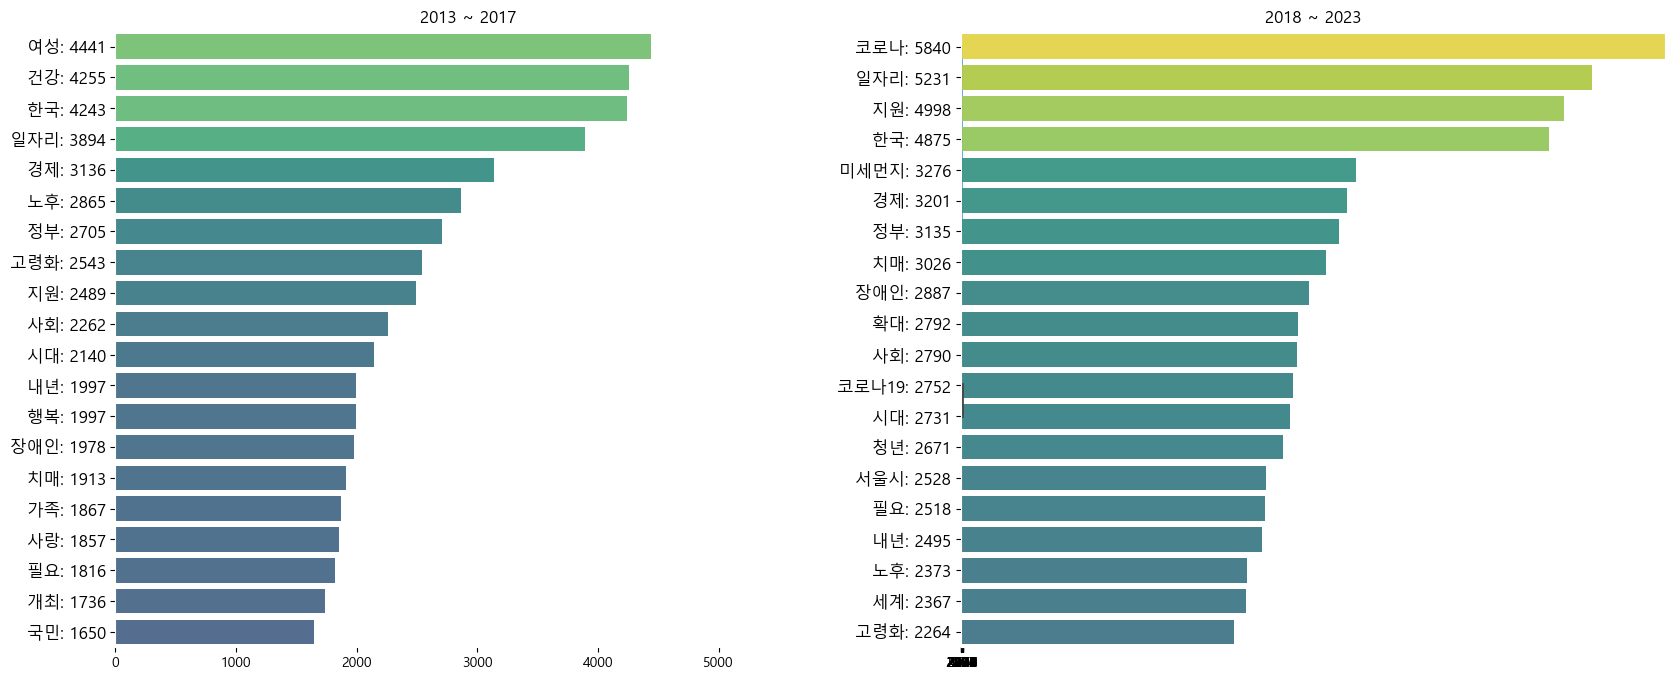

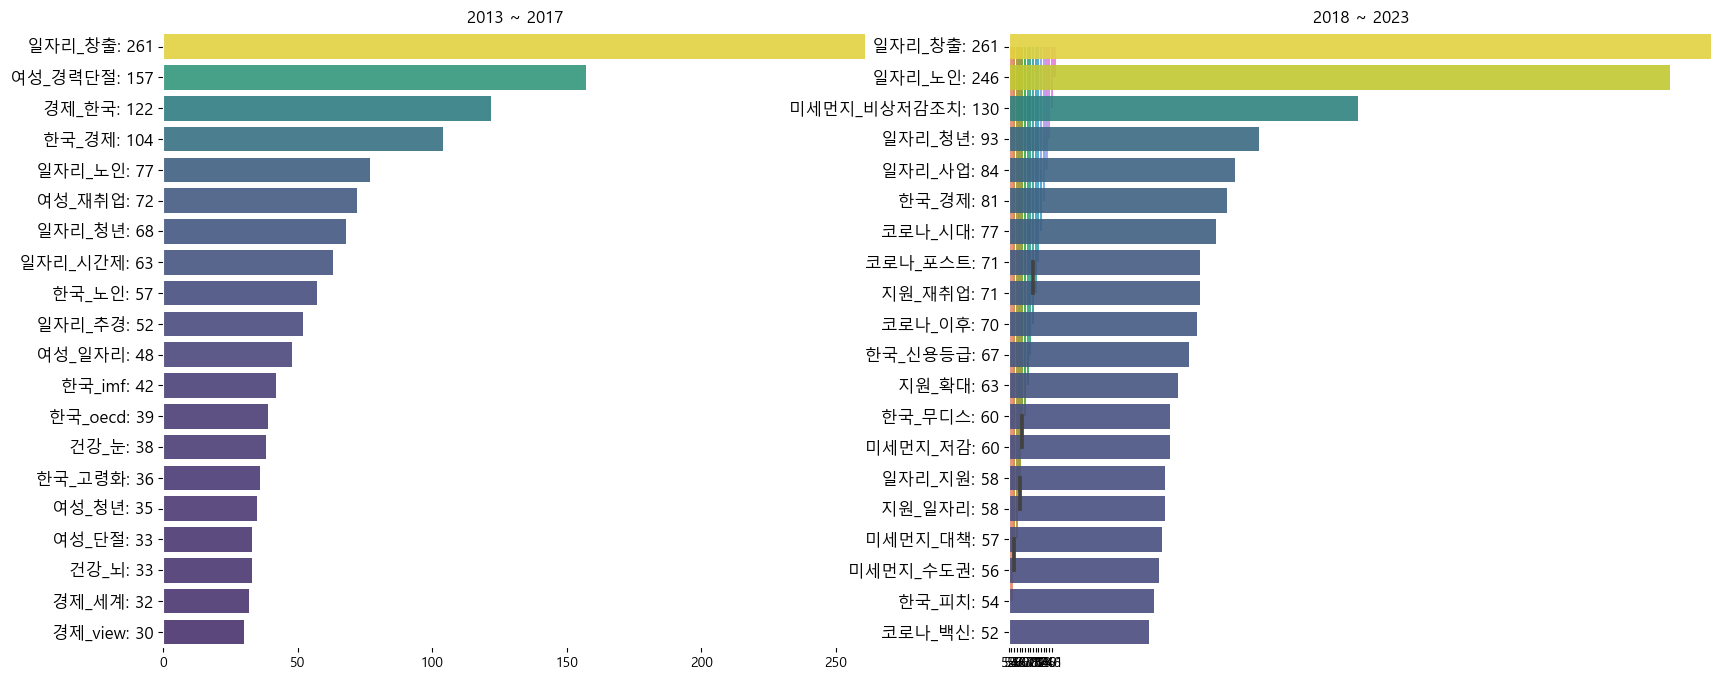

In [15]:
# word freq 비교 트랜드 시각화
plot_treemap_wordfreq(wf_era_soynlp, num_showkeyword=100, title='Ageism_Era', plot_studio=True, save_local=True, save_name='trend_era_compare_treemap_'+'~'.join(category.split(' ~ '))+'.html')
plot_sunburst_wordfreq(waf_era_soynlp, title='Ageism_Era', plot_studio=True, save_local=True, save_name='trend_era_compare_sunburst_'+'~'.join(category.split(' ~ '))+'.html')
plot_bar_wordfreq(wf_era_soynlp, figsize=(20,8), num_showkeyword=20, title='Ageism_Era', save_local=True, save_name='trend_era_compare_bar_byword_'+'~'.join(category.split(' ~ '))+'.png')
plot_bar_wordfreq(waf_era_soynlp, figsize=(20,8), num_showkeyword=20, title='Ageism_Era', save_local=True, save_name='trend_era_compare_bar_bywordadj_'+'~'.join(category.split(' ~ '))+'.png')

## 긍부정 트렌드: 연도별

In [18]:
df_plot = df_news.groupby('일자_YearMonth')[['Positive', 'Negative']].sum()
plot_bar(df_plot, summation=True, title='Ageism Sentiment')

## 긍부정 트렌드: 연도 및 카테고리별

In [13]:
df_plot = df_news.groupby(['Category', '일자_YearMonth'])[['Positive', 'Negative']].sum()
for categ in df_plot.index.get_level_values(0).unique():
    idx_sub = [idx for idx in df_plot.index if idx[0] == categ]
    df_sub = df_plot.loc[idx_sub,:].droplevel(0)
    plot_bar(df_sub, summation=True, title=categ)

## 긍부정 트렌드: 연도 및 세부카테고리별

In [ ]:
df_plot = df_news.groupby(['통합 분류1', '일자_YearMonth'])[['Positive', 'Negative']].sum()
for categ in df_plot.index.get_level_values(0).unique():
    idx_sub = [idx for idx in df_plot.index if idx[0] == categ]
    df_sub = df_plot.loc[idx_sub,:].droplevel(0)
    plot_bar(df_sub, summation=True, title=categ)

## 긍부정 트렌드: 연도 및 키워드별

In [14]:
df_plot = df_news.groupby(['Folder_Name', '일자_YearMonth'])[['Positive', 'Negative']].sum()
for categ in df_plot.index.get_level_values(0).unique():
    idx_sub = [idx for idx in df_plot.index if idx[0] == categ]
    df_sub = df_plot.loc[idx_sub,:].droplevel(0)
    plot_bar(df_sub, summation=True, title=categ)

## 긍부정 기사에 따른 키워드 트랜드 차이

In [15]:
# word freq 비교 트랜드 시각화
plot_treemap_wordfreq(wf_senti_soynlp, num_showkeyword=100, title='Ageism by Sentiment', plot_studio=True, save_local=True, save_name='trend_senti_compare_treemap.html')
plot_sunburst_wordfreq(waf_senti_soynlp, title='Ageism by Sentiment', plot_studio=True, save_local=True, save_name='trend_senti_compare_sunburst.html')